# Projeto 1

## Luiz Vitor Germanos Teixeira

### Pergunta:
Países que recebem auxílio internacional tem, como consequência, o crescimento no seu IDH? O seu índice de democracia tem algum impacto neste crescimento?




## Dados utilizados:
IDH

Índice de democracia

Ajuda monetária Internacional por pessoa


## Método:
Este projeto vai analisar uma faixa de tempo de 5 anos, começando em 1995 e terminando em 2000. Como o Índice de democracia utilizado é o Polity IV dataset, as nações serão classificadas de acordo com o seguinte sistema de rankeamento:

Países com um índice de -10 até -6, autocracia

Países com um índice de -5 até 0, anocracia fechada

Países com um índice de 1 até 5, anocracia aberta

Países com um índice de 6 até 9, democracia

Países com um índice de 10, democracia plena


A análise será feita da seguinte maneira, cada classificação receberá uma cor, depois será calculada a variação do IDH dos países em um período de 5 anos junto com somatório da ajuda financeira, também no mesmo período. Com esses dados será montado um gráfico para checar se existe alguma correlação entre o grau de democracia do país e o efeito da ajuda no crescimento do seu IDH.

## Importando bibliotecas e criando funções

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    #fig = plt.figure(figsize=(11, 6))
    #plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    #plt.tight_layout()

In [60]:
IndiceDemocracia = pd.read_excel('democracy_score_use_as_color.xlsx')
IDH = pd.read_excel('hdi_human_development_index.xlsx')
Aid = pd.read_excel('aid_received_total_us_inflation_adjusted.xlsx')
Aidperp = pd.read_excel("aid_received_per_person_current_us.xlsx")

## Selecionado o intervalo a ser estudado e limpando a database:

In [61]:
IDH_idx = IDH.set_index('geo')
anos = str.split(str(np.arange(1990,2011,1)))
IDHa = IDH_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
IDHa.head()

,1995,1996,1997,1998,1999,2000
geo,,,,,,
Afghanistan,0.324,0.328,0.332,0.335,0.338,0.340
Albania,0.628,0.637,0.636,0.646,0.656,0.662
Algeria,0.600,0.609,0.617,0.627,0.636,0.644
Andorra,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,0.382,0.391


In [62]:

Aidperp_idx = Aidperp.set_index('geo')
Aidperpa = Aidperp_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
Aidperpa.head()


,1995,1996,1997,1998,1999,2000
geo,,,,,,
Afghanistan,12.4,9.52,12.60,8.7,7.36,6.77
Albania,56.7,71.50,53.40,85.9,157.00,103.00
Algeria,10.2,10.40,8.29,13.8,4.48,6.41
Angola,29.2,31.30,23.50,21.6,24.30,18.40
Antigua and Barbuda,30.8,51.20,56.00,125.0,132.00,118.00


In [63]:

IndiceDemocracia.head()
IndiceDemocracia_idx = IndiceDemocracia.set_index('geo')
IndiceDemocraciaa = IndiceDemocracia_idx.loc[:,[1995, 1996, 1997, 1998, 1999, 2000]]
IndiceDemocracia1995 = IndiceDemocracia_idx.loc[:,[1995]]
limpo1995 = IndiceDemocracia1995

In [64]:
data = IDHa.join(Aidperpa, how='inner',lsuffix='_IDH', rsuffix='_Aid')
datia = data.join(IndiceDemocraciaa, how="inner",rsuffix='_Demo',lsuffix='_Aid' )
dados = datia.dropna()
dados

,1995_IDH,1996_IDH,1997_IDH,1998_IDH,1999_IDH,2000_IDH,1995_Aid,1996_Aid,1997_Aid,1998_Aid,1999_Aid,2000_Aid,1995,1996,1997,1998,1999,2000
geo,,,,,,,,,,,,,,,,,,
Afghanistan,0.324,0.328,0.332,0.335,0.338,0.340,12.400,9.520,12.6000,8.700,7.360,6.77,0.0,-7.0,-7.0,-7.0,-7.0,-7.0
Albania,0.628,0.637,0.636,0.646,0.656,0.662,56.700,71.500,53.4000,85.900,157.000,103.00,5.0,0.0,5.0,5.0,5.0,5.0
Algeria,0.600,0.609,0.617,0.627,0.636,0.644,10.200,10.400,8.2900,13.800,4.480,6.41,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0
Argentina,0.731,0.738,0.746,0.753,0.764,0.771,4.090,3.710,2.8600,2.360,2.320,1.63,7.0,7.0,7.0,7.0,8.0,8.0
Armenia,0.603,0.609,0.618,0.632,0.639,0.644,67.700,92.300,53.1000,62.500,67.700,70.30,3.0,-6.0,-6.0,5.0,5.0,5.0
Azerbaijan,0.609,0.610,0.615,0.626,0.636,0.642,15.600,12.400,23.5000,15.200,21.400,17.50,-6.0,-6.0,-6.0,-7.0,-7.0,-7.0
Bahrain,0.775,0.778,0.779,0.783,0.786,0.794,177.000,229.000,253.0000,325.000,97.200,90.90,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0
Bangladesh,0.423,0.432,0.441,0.450,0.459,0.468,10.800,10.100,8.1700,9.200,9.450,8.92,6.0,6.0,6.0,6.0,6.0,6.0
Benin,0.371,0.375,0.380,0.384,0.389,0.395,47.500,47.300,35.2000,31.700,31.900,35.60,6.0,6.0,6.0,6.0,6.0,6.0


In [65]:
datia.to_excel( 'Projeto1dataframe2.xlsx', index=True)

## Classificando os  Países

In [66]:
def categoria(x):
    if x == 10:
        return 'Full Democracy'
    elif x >= 6:
        return 'Medium'
    elif x >= 1:
        return 'Anocracy'
    elif x >= -5:
        return 'Closed Anocracy'
    else:
        return "Autocracy"

In [67]:
dados[1995]
dados[1995] = dados[1995].apply(categoria)
dados[1996] = dados[1996].apply(categoria)
dados[1997] = dados[1997].apply(categoria)
dados[1998] = dados[1998].apply(categoria)
dados[1999] = dados[1999].apply(categoria)
dados[2000] = dados[2000].apply(categoria)
IndiceDemocracia1995[1995] = IndiceDemocracia1995[1995].apply(categoria)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

## Criando um novo data frame para a análise

In [68]:
Total = dados
TotalIDH = Total["2000_IDH"] - Total["1995_IDH"]
TotalAid = Total["2000_Aid"] + Total["1995_Aid"] + Total["1996_Aid"] + Total["1997_Aid"] + Total["1998_Aid"] + Total["1999_Aid"]
Totalsum = pd.concat([TotalAid, TotalIDH], axis = 1)
Totalsum = Totalsum.join(IndiceDemocracia1995, how="inner")
Totalsum.columns = ['Ajudatotal5anos', 'DeltaIDH', 'Governo']
Totalsum.head()
#plt.scatter(TotalAid,TotalIDH,c="#7B68EE",alpha=0.8)

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Afghanistan,57.35,0.016,Closed Anocracy
Albania,527.50,0.034,Anocracy
Algeria,53.58,0.044,Closed Anocracy
Argentina,16.97,0.040,Medium
Armenia,413.60,0.041,Anocracy


In [69]:
limpo = pd.concat([TotalAid, TotalIDH], axis = 1)
Totalimpo = limpo.join(limpo1995, how="inner")
Totalimpo.columns = ['Ajudatotal5anos', 'DeltaIDH', 'Governo']
Totalimpo.head()

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Afghanistan,57.35,0.016,Closed Anocracy
Albania,527.50,0.034,Anocracy
Algeria,53.58,0.044,Closed Anocracy
Argentina,16.97,0.040,Medium
Armenia,413.60,0.041,Anocracy


In [70]:
#Totalsum.to_excel( 'Totalsum.xlsx', index=True)

## Análise preliminar

Nāo é possível determinar uma correlaçāo entre os níveis de regime e sua variaçāo de crescimento em 5 anos.


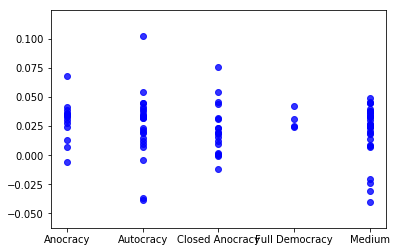

In [71]:
plt.scatter(Totalimpo["Governo"],Totalimpo["DeltaIDH"],c="Blue",alpha=0.8)

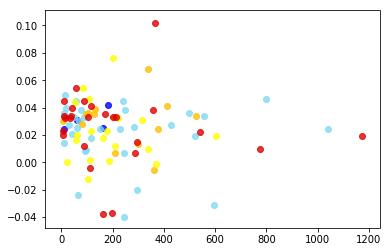

In [72]:
governos = ['Full Democracy', "Medium", "Anocracy", "Closed Anocracy", "Autocracy"]

cores = ["#0000FF", "#81DAF5", "#FFBF00","#FFFF00", "#DF0101"]

for e in range(5):
    dedo = Totalsum[Totalsum['Governo']==governos[e]]
    cor = cores[e]
    #reta(dedo["Ajudatotal5anos"],dedo["DeltaIDH"])
    plt.scatter(dedo["Ajudatotal5anos"],dedo["DeltaIDH"],c=cor,alpha=0.8)


### Democracia Plena

São poucos os países desta categoria que recebem auxílio, como pode ser observado no gráfico abaixo e tabela abaixo. Não se pode traçar uma correlação clara, porém os países que se destacam pertencem a instituições sólidas, como a União Europeia, ou como a Costa Rica que tem uma das democracias mais antigas do mundo e não tem um exército nacional. 



,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Costa Rica,10.51,0.024,Full Democracy
Mauritius,163.60,0.025,Full Democracy
Slovenia,182.80,0.042,Full Democracy
Uruguay,61.99,0.031,Full Democracy


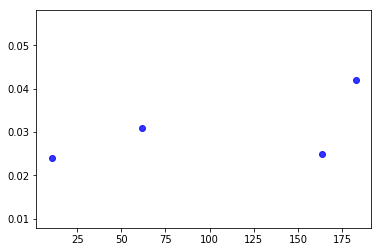

In [74]:
DemocraciaPlena = Totalsum[Totalsum['Governo'] == 'Full Democracy']
plt.scatter(DemocraciaPlena["Ajudatotal5anos"],DemocraciaPlena["DeltaIDH"],c='blue',alpha=0.8)
DemocraciaPlena

### Democracia
Neste bloco se encontram as nações que possuem um governo democrata, porém apresentam problemas. Novamente não é possível identificar uma correlação de que um aumento no auxílio financeiro interfere no crescimento do IDH.

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Argentina,16.970,0.040,Medium
Bangladesh,56.640,0.045,Medium
Benin,229.200,0.024,Medium
Bolivia,498.000,0.036,Medium
Botswana,295.000,-0.020,Medium
Brazil,8.808,0.036,Medium
Chile,48.300,0.033,Medium
Colombia,30.970,0.027,Medium
Ecuador,92.200,0.008,Medium


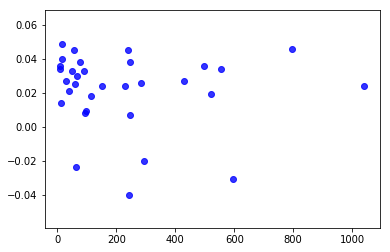

In [75]:
Democracia = Totalsum[Totalsum['Governo'] == 'Medium']
plt.scatter(Democracia["Ajudatotal5anos"],Democracia["DeltaIDH"],c='blue',alpha=0.8)
Democracia

### Anocracia
Neste bloco se encontram as nações que possuem uma especie de mistura de democracia com autocracia, um regime instavel sujeito a mudanças bruscas de liderança auxilio leve a um maior crescimento no seu IDH. Apesar disto estes países apresentam uma alta taxa de crescimento, como Moçambique, que em 1993 acabava de sair de uma guerra civil, e já em 1995 implementava reformas democraticas e economicas, algo que ajuda a explicar o seu desenvolvimento.

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Albania,527.500,0.034,Anocracy
Armenia,413.600,0.041,Anocracy
Cambodia,204.300,0.033,Anocracy
Central African Republic,211.200,0.007,Anocracy
"Congo, Rep.",362.070,-0.006,Anocracy
Dominican Republic,79.830,0.028,Anocracy
Fiji,298.900,0.013,Anocracy
Guatemala,132.100,0.039,Anocracy
Mexico,8.352,0.030,Anocracy


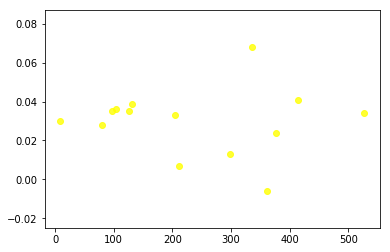

In [76]:
Anocracy = Totalsum[Totalsum['Governo'] == 'Anocracy']
plt.scatter(Anocracy["Ajudatotal5anos"],Anocracy["DeltaIDH"],c='yellow',alpha=0.8)
Anocracy

### Anocracia fechada
Esses países têm um viés mais autocrata do que democráticos, mas ainda possuem algumas características democráticas. Também não se possui uma correlação, os estados que tiveram crescimento alto como a Uganda, firmaram acordos com instituiçōes sólidas como o FMI eo banco Mundial


,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Afghanistan,57.35,0.016,Closed Anocracy
Algeria,53.58,0.044,Closed Anocracy
Burundi,113.33,0.002,Closed Anocracy
Cameroon,186.30,0.001,Closed Anocracy
"Congo, Dem. Rep.",21.73,0.000,Closed Anocracy
Croatia,84.08,0.054,Closed Anocracy
Gabon,367.53,-0.001,Closed Anocracy
Ghana,208.50,0.012,Closed Anocracy
Guinea,222.40,0.032,Closed Anocracy


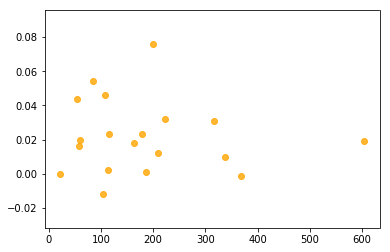

In [77]:
ClosedAnocracy = Totalsum[Totalsum['Governo'] == 'Closed Anocracy']
plt.scatter(ClosedAnocracy["Ajudatotal5anos"],ClosedAnocracy["DeltaIDH"],c='orange',alpha=0.8)
ClosedAnocracy

### Autocracia
Estes são regimes fechados e ditatoriais. O capital doado é um dos mais altos vistos até agora, isto se deve pelos conflitos que estes se encontravam como em Serra Leoa.

,Ajudatotal5anos,DeltaIDH,Governo
geo,,,
Azerbaijan,105.6000,0.033,Autocracy
Bahrain,1172.1000,0.019,Autocracy
China,12.0400,0.045,Autocracy
Cote d'Ivoire,286.0000,0.007,Autocracy
Cuba,33.6200,0.032,Autocracy
Djibouti,775.0000,0.010,Autocracy
Egypt,168.5000,0.035,Autocracy
Gambia,213.0000,0.033,Autocracy
Indonesia,40.2400,0.040,Autocracy


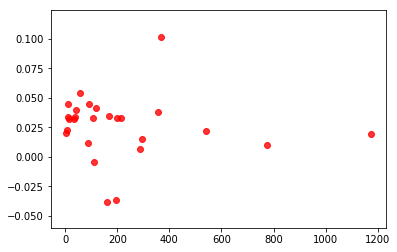

In [78]:
Autocracy = Totalsum[Totalsum['Governo'] == 'Autocracy']
plt.scatter(Autocracy["Ajudatotal5anos"],Autocracy["DeltaIDH"],c='red',alpha=0.8)
Autocracy

## Conclusão

Como visto nas análises anteriores o fator democrático não entra como um grande fator no crescimento do IDH mas sim o quão sólidas são as instituições dos países beneficiários tal como os acordos que estes firmão com seus doadores. E ainda assim o crescimento não está correlacionado com o tamanho da ajuda, como visto em todos os gráficos, eles se mantêm em faixas.


### Bibliografia

«Human Development Report 2016 – "Human Development for Everyone"» (PDF) (em inglês). Human Development Report (Human Development Report Office) - United Nations Development Programme. Consultado em 22 de março de 2017.

«Ministério das Relações Exteriores do Brasil»

«Fíji».

«Código de Redação da Comunidade Europeia»

"Mozambique | Partner Countries and Activities | English | Þróunarsamvinnustofnun Íslands" (in Icelandic). Iceida.is. 1 June 1999. Retrieved 2 May 2010.

 World DataBank World Development Indicators Mozambique The World Bank (2013), Retrieved 5 April 2013
 
African Economic Outlook

"2015 Human Development Report". United Nations 

"Численность населения Республики Казахстан по отдельным этносам на начало 2016 года". Archived from the original on 14 October 2017. Retrieved 24 May 2017.

"Kazakh TV – Kazakhstan enters top 50 most competitive countries"

National Institute of Statistics of Rwanda 2015.

Human Rights Watch & Wells 2008